Problem:
1. Bagaimana behavior pengguna Transjakarta
2. Bagaimana jumlah penggunaan metode transaksi Online (Aplikasi Transjakarta) oleh pengguna Transjakarta dibandingkan dengan metode transaksi yang lain

Strategy:
1. Data cleaning
2. Data analysis and visualisation

Goals:
1. Menentukan strategi promosi Aplikasi Transjakarta sehingga dapat meningkatkan jumlah pengguna Aplikasi Transjakarta

Expected Data Output:
1. Jumlah transaksi per corridor
2. Jumlah transaksi per hari
3. Jumlah transaksi per kelompok umur
4. Jumlah transaksi per metode transaksi
5. Jumlah transaksi per metode transaksi berdasarkan kelompok umur

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tj = pd.read_csv('Transjakarta.csv')

In [3]:
tj = tj.copy()
tj

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [4]:
tj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [5]:
# check missing values
print(tj.isnull().sum())

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64


<Axes: >

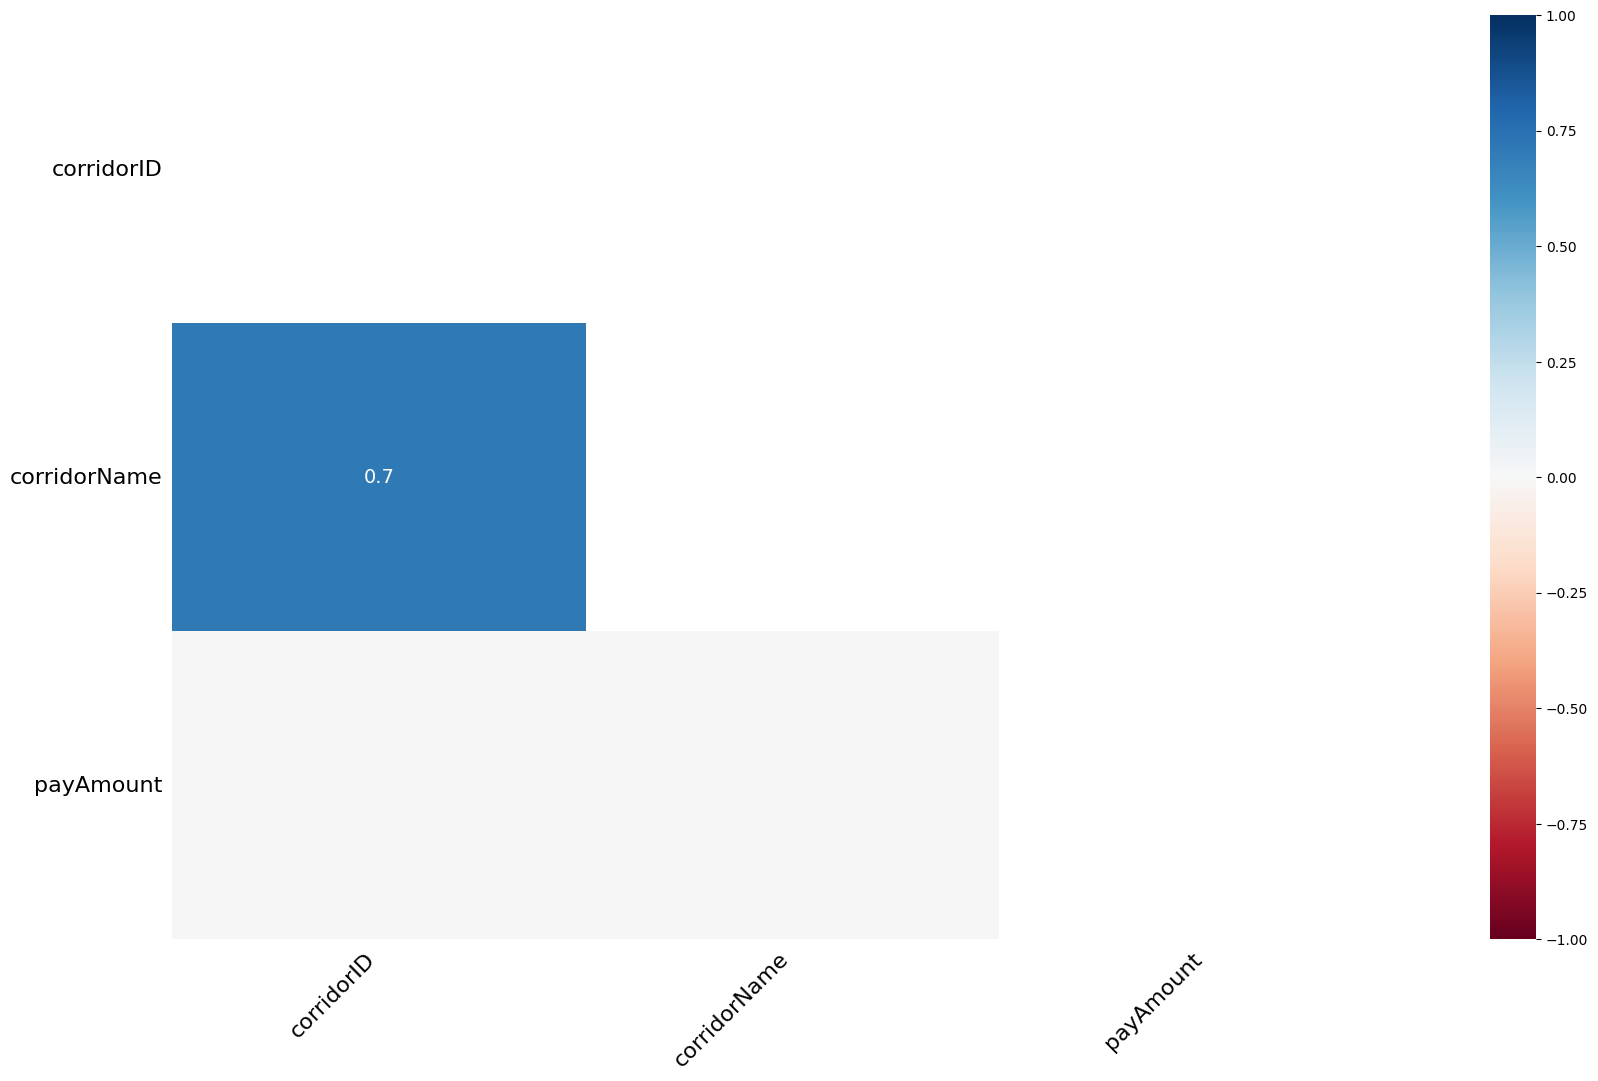

In [6]:
import missingno as msno

msno.heatmap(tj[['corridorID', 'corridorName', 'payAmount']])

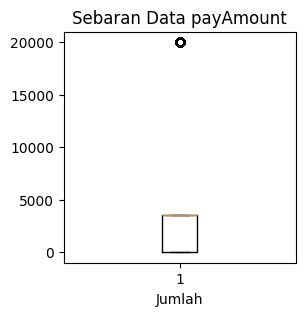

In [7]:
plt.figure(figsize=(3, 3))
plt.boxplot(tj['payAmount'].dropna())
plt.title('Sebaran Data payAmount')
plt.xlabel('Jumlah')
plt.show()

Informasi Awal:
- Periode data 1-30 April 2023
- Raw data terdiri dari 37.900 baris dan 22 kolom
- Target data yang perlu proses cleaning: corridorID, corridorName, tapInTime, tapOutTime
- Fokus data yang sudah ready: payCardBank, payCardSex, payCardBirthDate
- Terdapat data outlier pada kolom payAmount

## Data Cleaning

In [8]:
tj['tapInTime'] = pd.to_datetime(tj['tapInTime'])
tj['tapOutTime'] = pd.to_datetime(tj['tapOutTime'])
tj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  int64         
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  object        
 5   payCardBirthDate  37900 non-null  int64         
 6   corridorID        36643 non-null  object        
 7   corridorName      35970 non-null  object        
 8   direction         37900 non-null  float64       
 9   tapInStops        36687 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  int64         
 14  tapInTime         3790

In [9]:
tj.describe(include='all')

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
count,37900,3.790000e+04,37900,37900,37900,37900.000000,36643,35970,37900.000000,36687,...,37900.000000,37900.000000,37900,35611,36556,36556.000000,36556.000000,36556.000000,36556,36893.000000
unique,37900,NaN,6,1993,2,NaN,221,216,NaN,2570,...,NaN,NaN,NaN,2230,2248,NaN,NaN,NaN,NaN,NaN
top,FMZZ963S4B68ZP,NaN,dki,Fathonah Saefullah,F,NaN,1T,Cibubur - Balai Kota,NaN,P00170,...,NaN,NaN,NaN,P00016,BKN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,18743,80,20157,NaN,400,391,NaN,236,...,NaN,NaN,NaN,306,316,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.250060e+17,NaN,NaN,NaN,1990.089314,NaN,NaN,0.500633,NaN,...,106.841554,13.572480,2023-04-16 08:05:29.462770688,NaN,NaN,-6.214651,106.841233,21.219909,2023-04-16 09:19:44.697997824,2699.712683
min,NaN,6.040368e+10,NaN,NaN,NaN,1946.000000,NaN,NaN,0.000000,NaN,...,106.614730,0.000000,2023-04-01 06:22:27,NaN,NaN,-6.394973,106.614730,1.000000,2023-04-01 07:27:31,0.000000
25%,NaN,1.800442e+14,NaN,NaN,NaN,1982.000000,NaN,NaN,0.000000,NaN,...,106.803470,4.000000,2023-04-10 09:02:15,NaN,NaN,-6.247225,106.801750,11.000000,2023-04-10 10:18:06.249999872,0.000000
50%,NaN,3.507947e+15,NaN,NaN,NaN,1990.000000,NaN,NaN,1.000000,NaN,...,106.834830,10.000000,2023-04-16 17:38:42.500000,NaN,NaN,-6.214718,106.834580,18.000000,2023-04-16 19:03:14,3500.000000
75%,NaN,4.699023e+15,NaN,NaN,NaN,2001.000000,NaN,NaN,1.000000,NaN,...,106.882270,19.000000,2023-04-22 05:12:02.500000,NaN,NaN,-6.174736,106.883030,29.000000,2023-04-21 23:26:00.249999872,3500.000000
max,NaN,4.997694e+18,NaN,NaN,NaN,2012.000000,NaN,NaN,1.000000,NaN,...,107.023950,68.000000,2023-04-30 21:55:41,NaN,NaN,-6.091746,107.023660,77.000000,2023-04-30 23:23:18,20000.000000


In [10]:
# check duplicate data
tj.duplicated().value_counts()

False    37900
Name: count, dtype: int64

In [11]:
# mapping corridorID to corridorName
id_to_name = (tj.dropna(subset=["corridorID", "corridorName"])
              .drop_duplicates("corridorID")
              .set_index("corridorID")["corridorName"])

# mapping corridorName to corridorID
name_to_id = (tj.dropna(subset=["corridorID", "corridorName"])
              .drop_duplicates("corridorName")
              .set_index("corridorName")["corridorID"])

In [12]:
# fill corridorName
tj.loc[tj["corridorName"].isnull() & tj["corridorID"].notnull(), "corridorName"] = (
    tj.loc[tj["corridorName"].isnull() & tj["corridorID"].notnull(), "corridorID"].map(id_to_name)
)

# fill corridorID
tj.loc[tj["corridorID"].isnull() & tj["corridorName"].notnull(), "corridorID"] = (
    tj.loc[tj["corridorID"].isnull() & tj["corridorName"].notnull(), "corridorName"].map(name_to_id)
)

In [13]:
print(tj.isnull().sum())

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1125
corridorName        1125
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64


In [14]:
# mapping tapInStops to tapInStopsName
tapin_name_to_id = (tj.dropna(subset=["tapInStops", "tapInStopsName"])
                    .drop_duplicates("tapInStopsName")
                    .set_index("tapInStopsName")["tapInStops"])

# fill tapInStops
tj.loc[tj["tapInStops"].isnull(), "tapInStops"] = tj.loc[tj["tapInStops"].isnull(), "tapInStopsName"].map(tapin_name_to_id)


In [15]:
print(tj.isnull().sum())

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1125
corridorName        1125
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64


In [16]:
# fill corridor info from tapIn data
location_to_corridor = (tj.dropna(subset=["corridorID", "corridorName"])
                        .drop_duplicates(subset=["tapInStopsLat", "tapInStopsLon"]))

loc_key = list(zip(location_to_corridor["tapInStopsLat"], location_to_corridor["tapInStopsLon"]))
loc_to_id = dict(zip(loc_key, location_to_corridor["corridorID"]))
loc_to_name = dict(zip(loc_key, location_to_corridor["corridorName"]))

tj["tapInLocKey"] = list(zip(tj["tapInStopsLat"], tj["tapInStopsLon"]))

tj.loc[tj["corridorID"].isnull(), "corridorID"] = tj.loc[tj["corridorID"].isnull(), "tapInLocKey"].map(loc_to_id)
tj.loc[tj["corridorName"].isnull(), "corridorName"] = tj.loc[tj["corridorName"].isnull(), "tapInLocKey"].map(loc_to_name)

tj.drop(columns=["tapInLocKey"], inplace=True)

In [17]:
print(tj.isnull().sum())

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64


In [18]:
tj_clean = tj.dropna(subset=["corridorID", "corridorName"]).copy()
tj_clean.to_csv('transjakarta_clean.csv', index=False)

print(tj_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 37867 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37867 non-null  object        
 1   payCardID         37867 non-null  int64         
 2   payCardBank       37867 non-null  object        
 3   payCardName       37867 non-null  object        
 4   payCardSex        37867 non-null  object        
 5   payCardBirthDate  37867 non-null  int64         
 6   corridorID        37867 non-null  object        
 7   corridorName      37867 non-null  object        
 8   direction         37867 non-null  float64       
 9   tapInStops        37833 non-null  object        
 10  tapInStopsName    37867 non-null  object        
 11  tapInStopsLat     37867 non-null  float64       
 12  tapInStopsLon     37867 non-null  float64       
 13  stopStartSeq      37867 non-null  int64         
 14  tapInTime         37867 non

In [19]:
print(tj_clean.isnull().sum())

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2287
tapOutStopsName     1343
tapOutStopsLat      1343
tapOutStopsLon      1343
stopEndSeq          1343
tapOutTime          1343
payAmount           1007
dtype: int64


Informasi Akhir:
- Data yang sudah terproses cleaning terdiri dari 37.867 baris (berkurang 0,087%) dan 22 kolom
- Masih terdapat missing values dan data outlier pada kolom tapInStops, tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime, dan payAmount (diabaikan karena tidak memengaruhi analisis data selanjutnya).

## Data Analysis

In [20]:
# data calculation

tj_clean['trx_day'] = tj_clean['tapInTime'].dt.day_name()
tj_clean['age'] = 2023 - tj_clean['payCardBirthDate']
tj_clean['age_category'] = pd.cut(
    tj_clean['age'], 
    bins=[0, 17, 25, 40, 55, 100],
    labels=['Anak', 'Remaja', 'Dewasa', 'Orang Tua', 'Lanjut Usia'])

In [21]:
tj_final = tj_clean.copy()
tj_final.to_csv('transjakarta_clean_final.csv', index=False)

print(tj_final.info())

<class 'pandas.core.frame.DataFrame'>
Index: 37867 entries, 0 to 37899
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37867 non-null  object        
 1   payCardID         37867 non-null  int64         
 2   payCardBank       37867 non-null  object        
 3   payCardName       37867 non-null  object        
 4   payCardSex        37867 non-null  object        
 5   payCardBirthDate  37867 non-null  int64         
 6   corridorID        37867 non-null  object        
 7   corridorName      37867 non-null  object        
 8   direction         37867 non-null  float64       
 9   tapInStops        37833 non-null  object        
 10  tapInStopsName    37867 non-null  object        
 11  tapInStopsLat     37867 non-null  float64       
 12  tapInStopsLon     37867 non-null  float64       
 13  stopStartSeq      37867 non-null  int64         
 14  tapInTime         37867 non

In [22]:
rank_corridor = tj_final['corridorName'].value_counts().head(10)
rank_corridor

corridorName
Cibubur - Balai Kota                           405
Ciputat - CSW                                  395
Pulo Gadung - Monas                            355
Harmoni - Jakarta International Stadium        351
Kalideres - Bundaran HI via Veteran            349
Kebayoran Lama - Tanah Abang                   347
Kampung Rambutan - Pondok Gede                 343
Rusun Pondok Bambu - Walikota Jakarta Timur    342
Pasar Minggu - Tanah Abang                     324
Rusun Rawa Bebek - Kodamar                     324
Name: count, dtype: int64

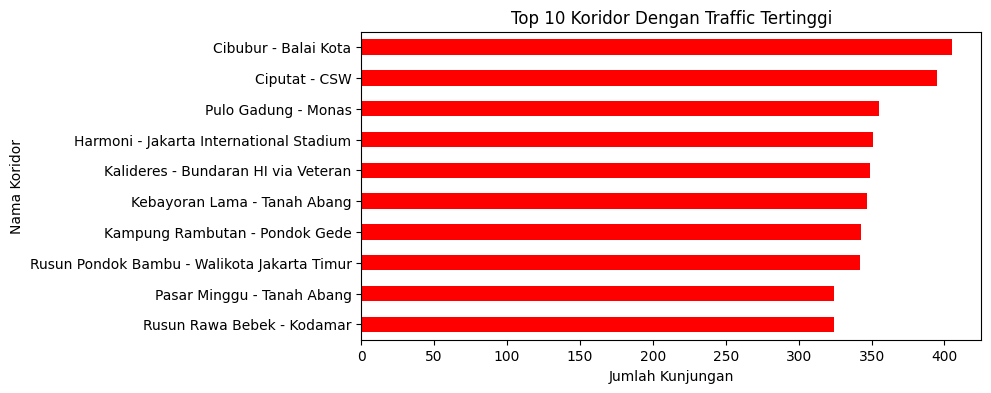

In [23]:
# Transaction rank by Corridor (Traffic)
plt.figure(figsize=(8, 4))
rank_corridor.sort_values().plot(kind='barh', color='red')
plt.title('Top 10 Koridor Dengan Traffic Tertinggi')
plt.xlabel('Jumlah Kunjungan')
plt.ylabel('Nama Koridor')
plt.show()

In [24]:
trx_daily = tj_final['trx_day'].value_counts()
trx_daily

trx_day
Friday       6850
Wednesday    6840
Monday       6838
Tuesday      6835
Thursday     6834
Sunday       1858
Saturday     1812
Name: count, dtype: int64

/var/folders/3g/w3wghdxn1ll0bf_xms41vx1m0000gp/T/ipykernel_7365/4146256990.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=trx_daily.index, y=trx_daily.values, palette='Blues')


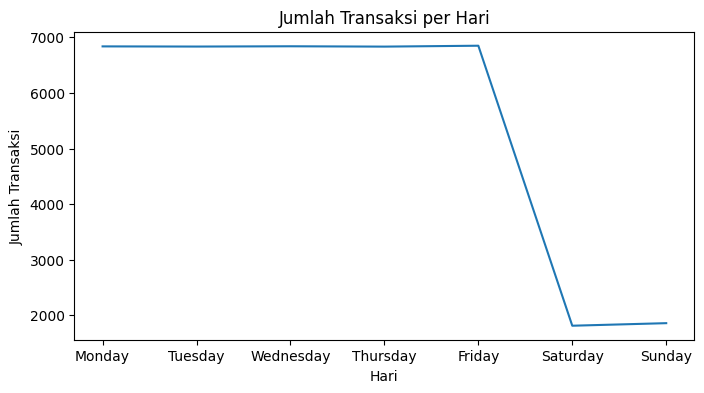

In [25]:
# Transaction Number by Day
plt.figure(figsize=(8, 4))
trx_daily = trx_daily.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
sns.lineplot(x=trx_daily.index, y=trx_daily.values, palette='Blues')
plt.title('Jumlah Transaksi per Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Transaksi')
plt.show()

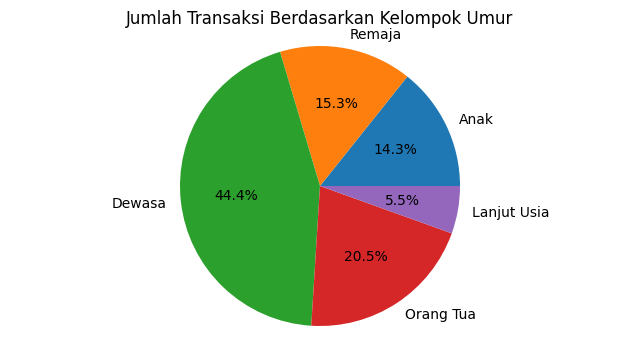

In [26]:
# Transactions Number by Age
trx_by_age = tj_final['age_category'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.pie(trx_by_age, 
        labels=trx_by_age.index, 
        autopct='%1.1f%%'
)
plt.title('Jumlah Transaksi Berdasarkan Kelompok Umur')
plt.axis('equal')
plt.show()

In [31]:
# Transaction Method Distribution
trx_method = tj_final['payCardBank'].value_counts().reset_index()
trx_method.columns = ['metode', 'transaction_num']
trx_method['percentage'] = (trx_method['transaction_num'] / trx_method['transaction_num'].sum()) * 100
trx_method['percentage'] = trx_method['percentage'].round(2)
trx_method

,metode,transaction_num,percentage
0,dki,18722,49.44
1,emoney,6861,18.12
2,brizzi,3531,9.32
3,flazz,3232,8.54
4,online,2865,7.57
5,bni,2656,7.01


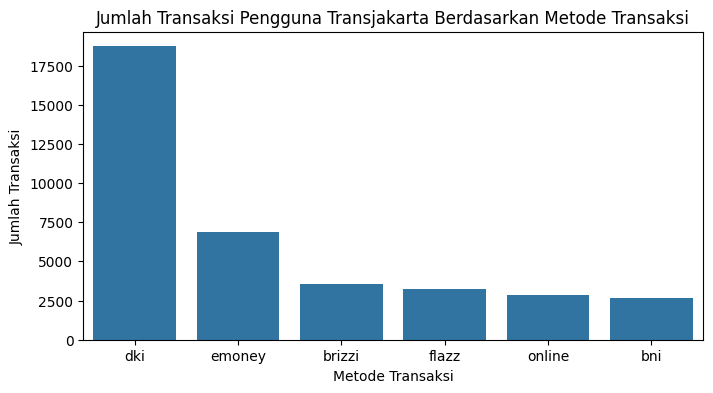

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(
    data = trx_method,
    x = 'metode',
    y = 'transaction_num',
)
plt.title('Jumlah Transaksi Pengguna Transjakarta Berdasarkan Metode Transaksi')
plt.xlabel('Metode Transaksi')
plt.ylabel('Jumlah Transaksi')
plt.show()


In [29]:
# Transaction method distribution by Age
trx_method_by_age = tj_final.groupby(['payCardBank', 'age_category']).size().unstack(fill_value=0)
trx_method_by_age

/var/folders/3g/w3wghdxn1ll0bf_xms41vx1m0000gp/T/ipykernel_7365/1842937885.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trx_method_by_age = tj_final.groupby(['payCardBank', 'age_category']).size().unstack(fill_value=0)


age_category,Anak,Remaja,Dewasa,Orang Tua,Lanjut Usia
payCardBank,,,,,
bni,502,455,1140,421,138
brizzi,465,486,1597,881,102
dki,2299,3161,8157,3835,1270
emoney,1281,1061,2851,1417,251
flazz,432,331,1677,618,174
online,428,311,1390,591,145


<Figure size 800x400 with 0 Axes>

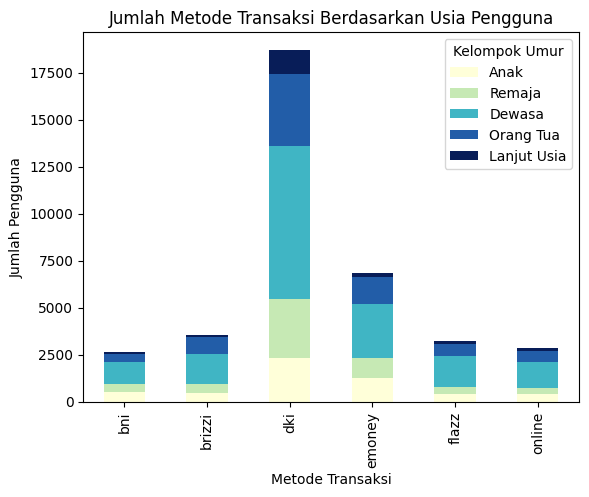

In [30]:
plt.figure(figsize=(8,4))
trx_method_by_age.plot(kind='bar', stacked=True, colormap='YlGnBu')
plt.title('Jumlah Metode Transaksi Berdasarkan Usia Pengguna')
plt.xlabel('Metode Transaksi')
plt.ylabel('Jumlah Pengguna')
plt.legend(title='Kelompok Umur')
plt.show()

Kesimpulan

Untuk dapat meningkatkan jumlah pengguna metode transaksi Online/Aplikasi di Transjakarta, beberapa hal yang dapat dilakukan diantaranya:

1. Fokus tempat promosi pada 10 koridor dengan traffic pengguna tertinggi:
    - Cibubur - Balai Kota
    - Ciputat - CSW
    - Pulo Gadung - Monas
    - Harmoni - Jakarta International Stadium
    - Kalideres - Bundaran HI via Veteran
    - Kebayoran Lama - Tanah Abang
    - Kampung Rambutan - Pondok Gede
    - Rusun Pondok Bambu - Walikota Jakarta Timur
    - Pasar Minggu - Tanah Abang
    - Rusun Rawa Bebek - Kodamar

2. Fokus waktu promosi pada peak-days, yaitu Senin-Jumat yang memiliki jumlah transaksi lebih tinggi secara signifikan dibanding weekend

3. Fokus sasaran promosi pada kelompok umur Dewasa yang mendominasi mayoritas pengguna

4. Jalin kerjasama dengan Bank DKI yang mendominasi secara sangat signifikan sebagai metode transaksi yang paling banyak digunakan oleh pengguna Transjakarta, bisa dalam bentuk sinkronisasi metode pembayaran dalam Aplikasi menggunakan Bank DKI

5. Fokus sasaran promosi pada kelompok umur Dewasa yang mendominasi mayoritas pengguna metode transaksi Online/Aplikasi

Link Tableau Public:
https://public.tableau.com/views/Capstone_2_17483397216650/TopCorridorTraffic?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link